In [24]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [25]:
clicks_df = pd.read_csv('stud_dates_click.csv')
clicks_df

,code_module,code_presentation,id_student,final_result,-25,-24,-23,-22,-21,-20,...,260,261,262,263,264,265,266,267,268,269
0,AAA,2013J,11391,Pass,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AAA,2013J,28400,Pass,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AAA,2013J,30268,Withdrawn,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AAA,2013J,31604,Pass,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,AAA,2013J,32885,Pass,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,Fail,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32589,GGG,2014J,2645731,Distinction,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32590,GGG,2014J,2648187,Pass,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32591,GGG,2014J,2679821,Withdrawn,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
stud_df = pd.read_csv('./data/studentInfo.csv')
stud_df

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


In [27]:
# merge three table for further processing
data = pd.merge(stud_df, clicks_df, on=['code_module', 'code_presentation', 'id_student', 'final_result'], how='inner')
data

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,260,261,262,263,264,265,266,267,268,269
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
# change the label of target
data['final_result'] = data['final_result'].map({'Pass':1, 'Distinction':1, 'Withdrawn':0, 'Fail':0})

# split the data into train and test
dataX = data.drop(columns='final_result')
target = data['final_result']
X_train, X_test, y_train, y_test = train_test_split(dataX, target, test_size=0.2, stratify=target)

In [29]:
def prepare_data(X, rule='W', week_no=None):
    
    #clicks data
    cols = [str(i) for i in range(-25, 270)]
    X1 = X[cols]
    X1 = X1.T
    X1.index = pd.date_range(start='1/1/2014', periods=295)
    X1 = X1.resample(rule).sum()
    X1 = X1.T
    if week_no:
        X1 = X1.iloc[:, :week_no]
          
    return X1

In [30]:
from tensorflow.keras.layers import Dense, Input, Conv1D, BatchNormalization,AveragePooling1D, Flatten, Add, Multiply, Softmax, LSTM
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import Sequential, Model

In [31]:
def visualize_loss(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.legend(['Train', 'Validation'])
    plt.show()

# CNN base model

In [52]:
# define model
def cnn_model():
    cnn = Sequential()
    cnn.add(Conv1D(32, kernel_size=2, activation='relu', input_shape=(X_train_clicks.shape[1],1)))
    cnn.add(BatchNormalization())
    cnn.add(AveragePooling1D(2))
    cnn.add(Conv1D(64, kernel_size=2, activation='relu'))
    cnn.add(BatchNormalization())
    cnn.add(AveragePooling1D(2))
    cnn.add(Flatten())
    cnn.add(Dense(128,  activation='relu'))
    cnn.add(Dense(64,  activation='relu'))
    cnn.add(Dense(32,  activation='relu'))
    cnn.add(Dense(1,  activation='sigmoid'))
    # compile the model
    cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return cnn


# Define ann model
def ann_model():
    ann = Sequential()
    ann.add(Dense(128, activation='relu', input_shape=(X_train_clicks.shape[1],)))
    ann.add(Dense(64, activation='relu'))
    ann.add(Dense(16, activation='relu'))
    ann.add(Dense(1, activation='sigmoid'))
    # compile the model
    ann.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return ann


# define lstm model
def lstm_model():
    lstm = Sequential()
    lstm.add(LSTM(25, activation='relu', input_shape=(X_train_clicks.shape[1],1), return_sequences=True))
    lstm.add(LSTM(10, activation='relu', return_sequences=False))
    lstm.add(Dense(1, activation='sigmoid'))
    # compile the model
    lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return lstm

# Lets do the early prediction based on every months

In [54]:
# week vs accuracy
accuracy = {'ann':[], 'cnn':[], 'lstm':[]}

for i in range(12, 41, 4):
    # prepare the data
    X_train_clicks = prepare_data(X_train, week_no=i)
    X_test_clicks = prepare_data(X_test, week_no=i)
    
    # change dimension
    X_train_clicks_2 = X_train_clicks.to_numpy().reshape(X_train_clicks.shape[0], X_train_clicks.shape[1], 1)
    X_test_clicks_2 = X_test_clicks.to_numpy().reshape(X_test_clicks.shape[0], X_test_clicks.shape[1], 1)
    
    # call model
    models = {'ann':ann_model(), 'cnn':cnn_model(), 'lstm':lstm_model()}
    for name, model in models.items():
    
        # save model based on validation accuracy
        path = 'model/week_model.h5'
        callbacks = ModelCheckpoint(path, save_best_only=True, save_weights_only=True, mode='max', monitor='val_accuracy', verbose=0)

        # train the model
        if name=='ann':
            model.fit(X_train_clicks, y_train, validation_split=0.1, epochs=20, batch_size=32, verbose=0, callbacks=[callbacks])
        else:
            model.fit(X_train_clicks_2, y_train, validation_split=0.1, epochs=20, batch_size=32, verbose=0, callbacks=[callbacks])

        # load the model weight and Test 
        model.load_weights(path)
        if name=='ann':
            predict = model.predict(X_test_clicks)
        else:
            predict = model.predict(X_test_clicks_2)
            
        predict = np.where(predict>0.5, 1, 0)
        accuracy[name].append(accuracy_score(predict, y_test)) 

ConversionError: Failed to convert value(s) to axis units: ['ann', 'cnn', 'lstm']

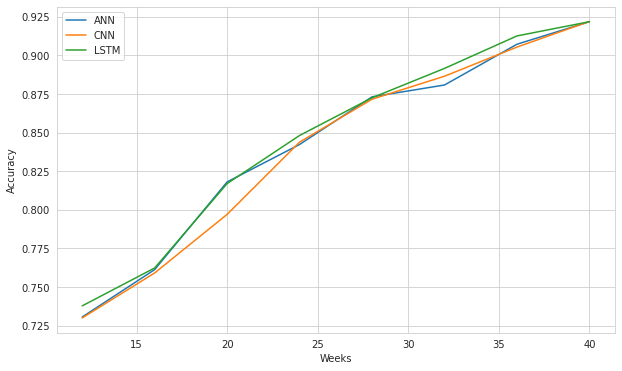

In [55]:
idx = list(range(12, 41, 4))
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
for name, val in accuracy.items():
    plt.plot(idx, val, label=name.upper())
plt.legend()
plt.xlabel('Weeks')
plt.ylabel('Accuracy')
plt.xticks((idx)

([<matplotlib.axis.XTick at 0x7f2a1455ad90>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

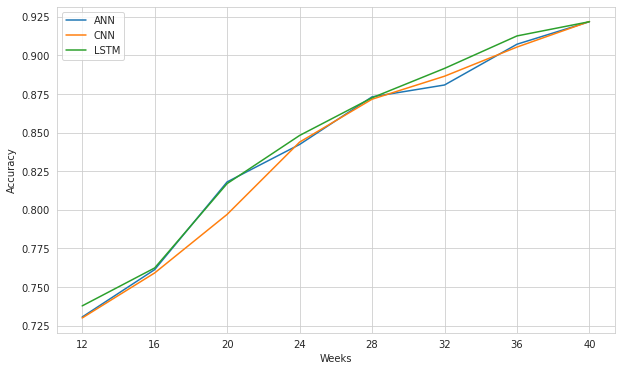

In [57]:
idx = list(range(12, 41, 4))
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
for name, val in accuracy.items():
    plt.plot(idx, val, label=name.upper())
plt.legend()
plt.xlabel('Weeks')
plt.ylabel('Accuracy')
plt.xticks(idx)

In [ ]:
# log on y-axix